In [1]:
# import sys
# sys.path.append("../utils")
from utils.generate_field import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2
import math
from matplotlib import cm, colors
import imageio
import os
result_dir = '/home/zyou6474/tasks/channel_flow'

ModuleNotFoundError: No module named 'utils'

In [14]:
dims = [128, 128, 64]
fdims = [130, 128, 64]
domain = [2*np.pi, np.pi, 1]
x_coords, y_coords, z_coords = xyz(domain, dims)
dx = x_coords[1]- x_coords[0]

ld = np.linspace(0, domain[0]+2*dx, fdims[0])
fk_x = np.arange(130)*2*np.pi/domain[0]
fk_y = np.arange(128)*2*np.pi/domain[1]

half_kx_ind = math.floor(dims[0]/2)+1
half_kx = fk_x[:half_kx_ind]
half_ky_ind = math.floor(dims[1]/2) + 1 - 1

In [15]:
# recent result
recent_dir = result_dir + r'/outputs'

dir = recent_dir
t_ind = 1
t_total = 5000
timestep = np.linspace(0, t_total, 51)


In [16]:
# filename of different varaibles
theta_f = dir + r'/theta.01.%.8i'
velocity_f = dir + r'/baseflow/u_base.%.8i'



# Z-index of where the source is located at
z_ind = np.argmin(abs(z_coords-0.5))
print(z_ind)

43


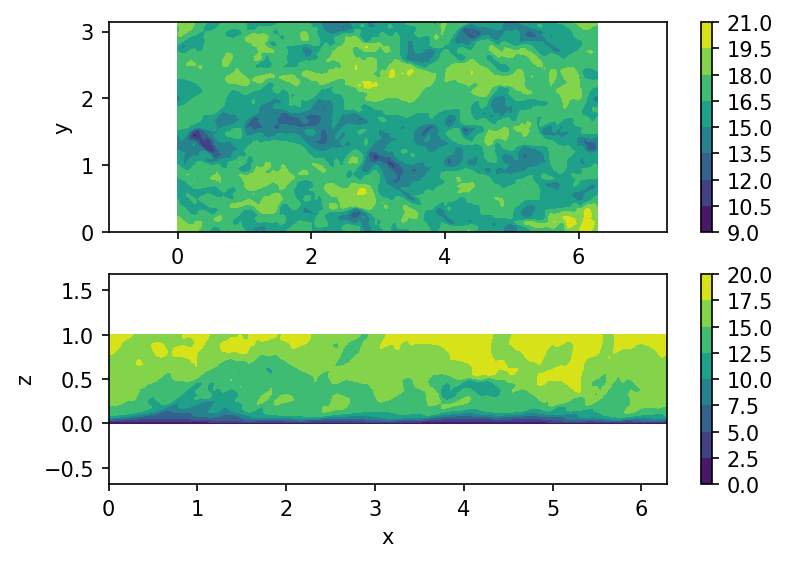

In [17]:
u = read_array_from_file(velocity_f % t_ind, dims)


fig, ax = plt.subplots(2, 1, figsize=(6,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, u[:, :, z_ind].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')

ax[0].set_ylim(bottom=0)

cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, u[:, 64, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')

ax[1].set_ylim(bottom=0)

cbar = fig.colorbar(cs1)
fig.show()

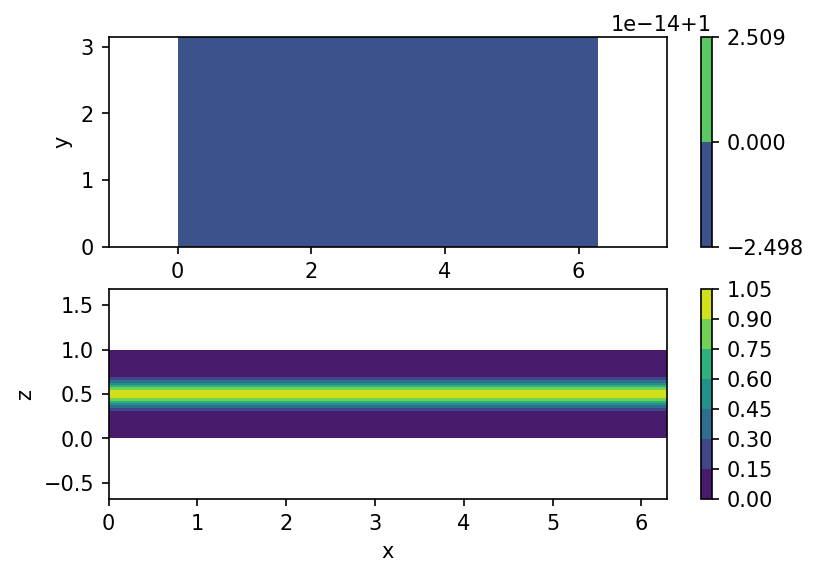

In [18]:
# Reconstructed Scalar field
theta_o = read_array_from_file(theta_f % int(t_ind-1), dims)
# theta[theta>0] =0

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(2, 1, figsize=(6,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, theta_o[:, :, z_ind].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')

ax[0].set_ylim(bottom=0)

cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, theta_o[:, 64, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')

ax[1].set_ylim(bottom=0)

cbar = fig.colorbar(cs1)
fig.show()

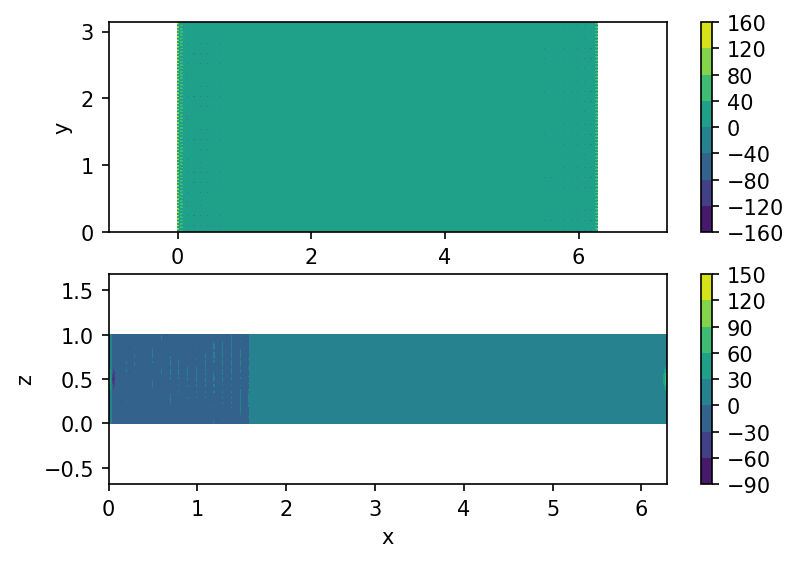

In [19]:
# Reconstructed Scalar field
theta = read_array_from_file(theta_f % t_ind, dims)
# theta[theta>0] =0

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(2, 1, figsize=(6,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, theta[:, :, z_ind].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')

ax[0].set_ylim(bottom=0)

cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, theta[:, 64, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')

ax[1].set_ylim(bottom=0)

cbar = fig.colorbar(cs1)
fig.show()

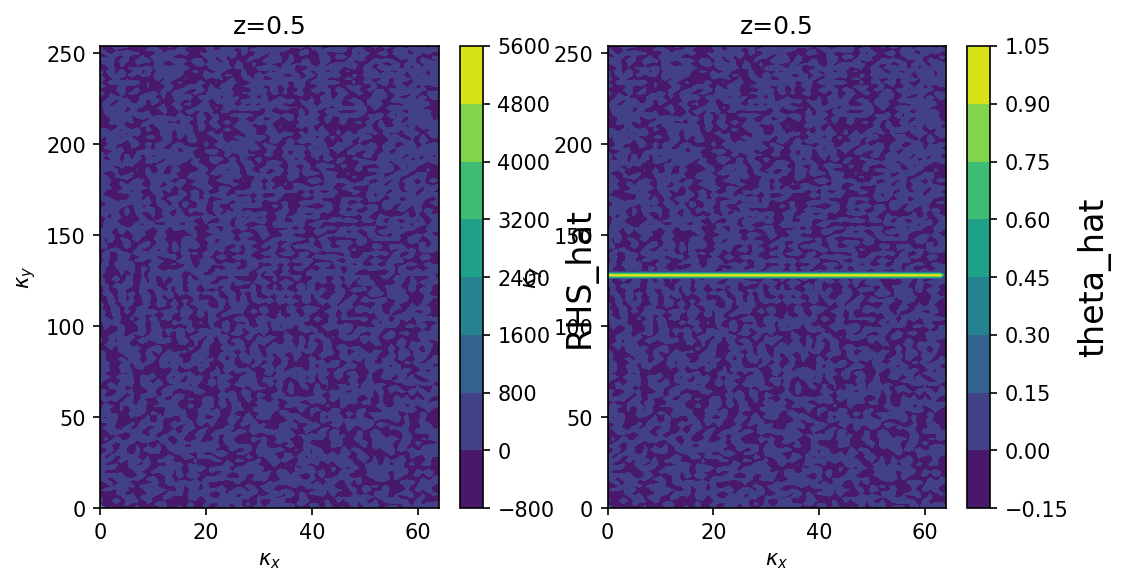

In [20]:
# Spectrum of RHS

RHS_hat_f = dir + '/RHS_col.%.8i'
RHS_hat = read_array_from_file(RHS_hat_f % int(t_ind), [130, 128, 64])

theta_hat_f = dir + '/theta_hat.%.8i'
theta_hat = read_array_from_file(theta_hat_f % int(t_ind), [130, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi=150)
cs = axes[0].contourf( half_kx, fk_y, RHS_hat[::2, :, z_ind].T)
axes[0].set_xlabel('$\kappa_x$')
axes[0].set_ylabel('$\kappa_y$')
# axes[0].axis('equal')
axes[0].set_title('z=0.5')

cbar = fig.colorbar(cs)
cbar.set_label(r'RHS_hat', size=16)


cs1 = axes[1].contourf( half_kx, fk_y, theta_hat[::2, :, z_ind].T)
axes[1].set_xlabel('$\kappa_x$')
axes[1].set_ylabel('$\kappa_y$')
# axes[0].axis('equal')
axes[1].set_title('z=0.5')

cbar = fig.colorbar(cs1)
cbar.set_label(r'theta_hat', size=16)


fig.show()

In [21]:
a = theta_hat[::2, :, z_ind]
np.unravel_index(np.argmax(a, axis=None), a.shape)
half_ky_ind

theta_o_hat = fft(theta_o[:, half_ky_ind, z_ind])

Text(0.5, 1.0, 'Imaginary part of theta_hat')

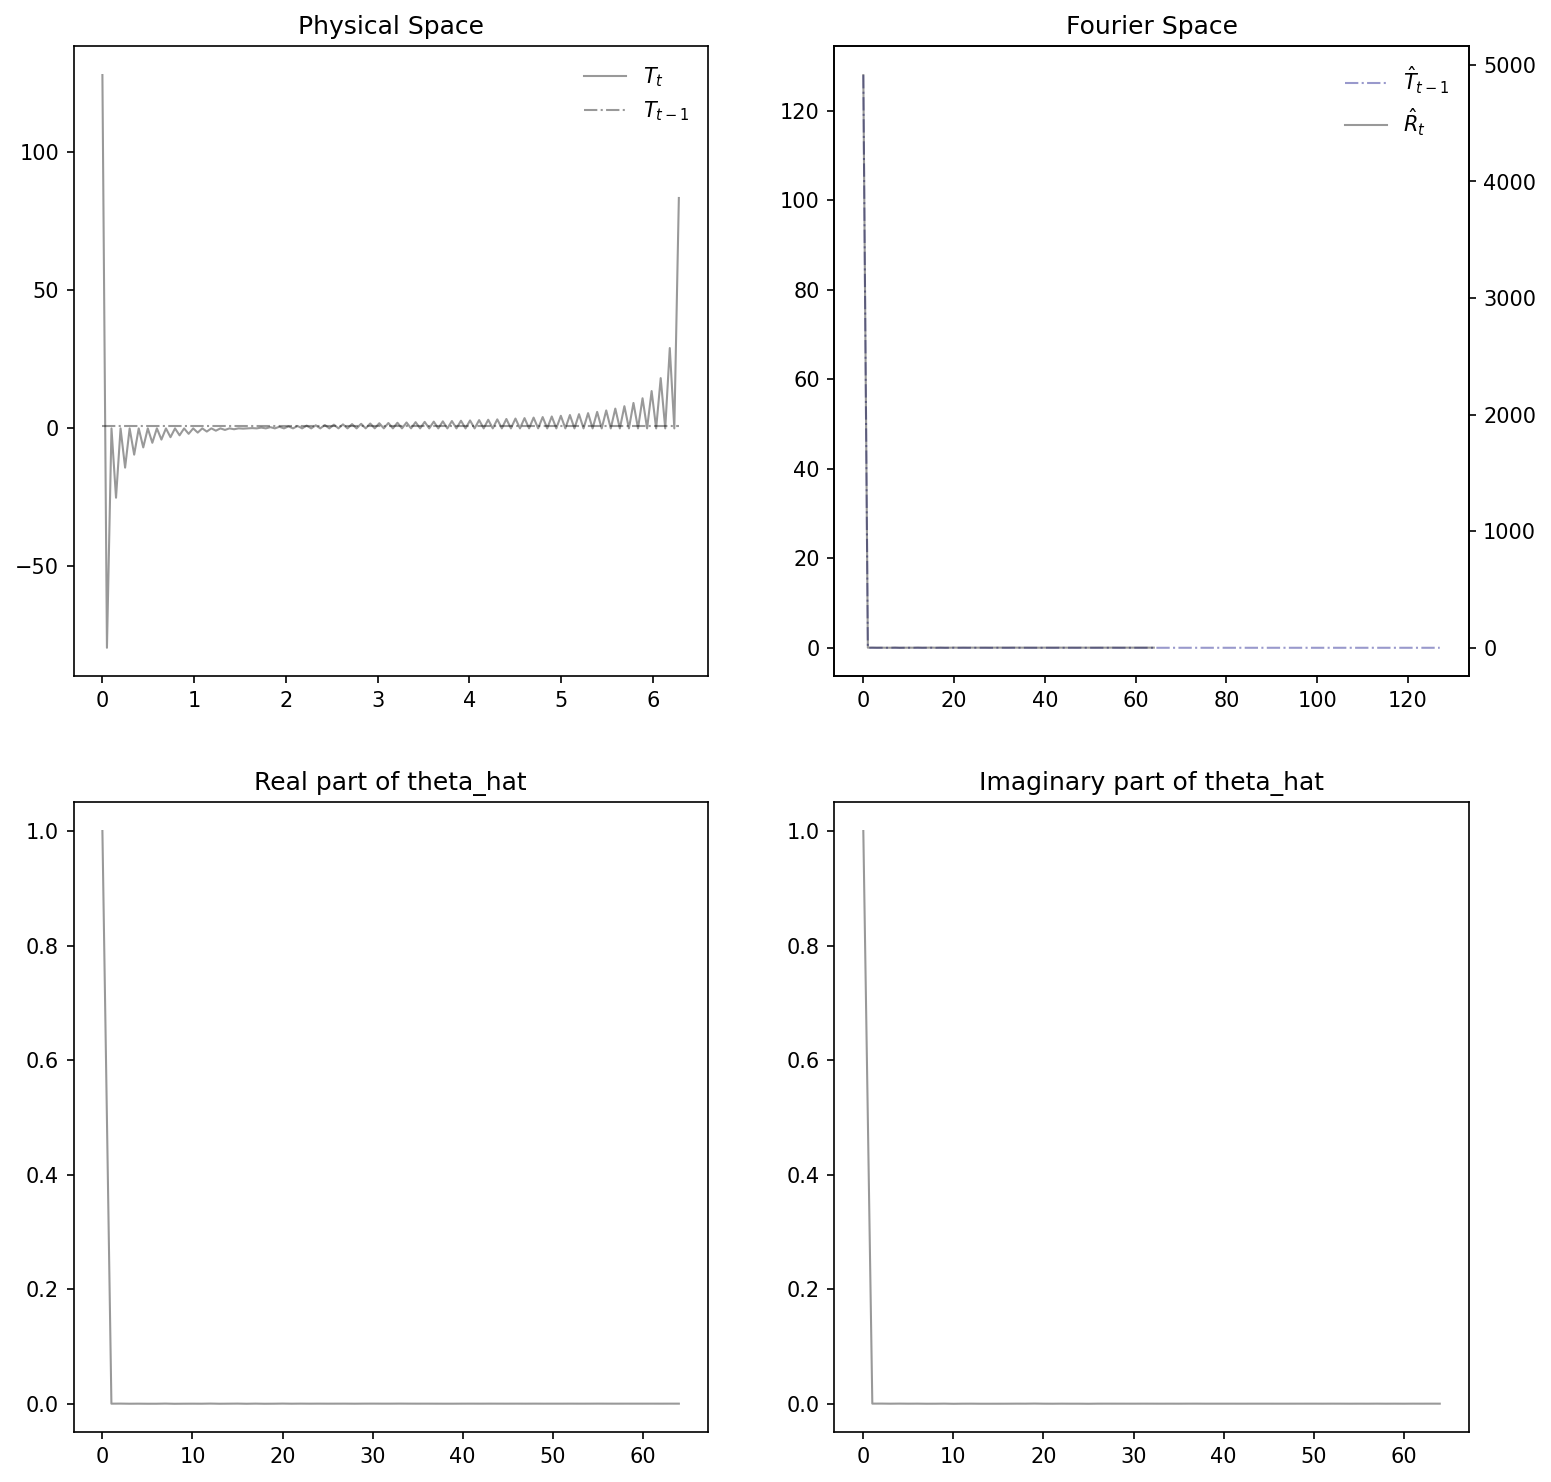

In [25]:
half_ky_ind = 0
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=150)
axes = axes.flatten()
lns12 = axes[0].plot(x_coords, theta_o[:, half_ky_ind, z_ind], label='$T_{t-1}$', linestyle='-.', color='black', alpha=0.4, linewidth=1)
lns11 = axes[0].plot(x_coords, theta[:, half_ky_ind, z_ind], label='$T_{t}$', color='black', alpha=0.4, linewidth=1)
lns1 = lns11+lns12
labs1 = [l.get_label() for l in lns1]
axes[0].legend(lns1, labs1, loc=0, frameon=False)
axes[0].set_title('Physical Space')
# axes[0].legend()

ax1 = axes[1].twinx()
lns21 = axes[1].plot(fk_x[:-2], theta_o_hat, label='$\hat{T}_{t-1}$', linestyle='-.', color='navy', alpha=0.4, linewidth=1)
lns22 = ax1.plot(half_kx, RHS_hat[::2, half_ky_ind, z_ind], label='$\hat{R}_{t}$', color='black', alpha=0.4, linewidth=1)

# added these three lines
lns2 = lns21+lns22
labs2 = [l.get_label() for l in lns2]
axes[1].legend(lns2, labs2, loc=0, frameon=False)
axes[1].set_title('Fourier Space')



axes[2].plot(half_kx, theta_hat[::2, half_ky_ind, z_ind], color='black', alpha=0.4, linewidth=1)
axes[2].set_title(r'Real part of theta_hat')

axes[3].plot(half_kx, theta_hat[1::2, half_ky_ind, z_ind], color='black', alpha=0.4, linewidth=1)
axes[3].set_title(r'Imaginary part of theta_hat')

In [23]:
print(theta_hat[-4:, half_ky_ind, z_ind])

[1. 1. 0. 0.]


In [24]:
gif_dir = dir + '/../gif'
if not os.path.exists(gif_dir):
    os.makedirs(gif_dir)
filenames = []
for i in timestep:
    fig = contourf_t(theta_f, i, domain, dims, z_ind=32)
    
    # create file name and append it to a list
    filename = gif_dir + f'/%.5i.png' % i
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer(gif_dir + '/mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
# for filename in set(filenames):
    # os.remove(filename)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zyou6474/tasks/channel_flow/outputs/theta.01.00000100'